In [11]:
import sys
import networkx as nx
import matplotlib.pyplot as plt
import copy

In [3]:
# import assignment_1

In [6]:
def give_zero_matrix(m,n):
    c=[]
    l=0
    for i in range(m):
        c.append([])
        for j in range(n):
            c[i].append(0)
        
    return c

def give_me_identity(n):
    I=[]
    for i in range(n):
        l=[]
        for j in range(n):
            if i!=j:
                l.append(0)
            else:
                l.append(1)
        I.append(l)
    return I
def norm(a,flag):
    if flag==0:
        s=0
        s=[i**2 for i in a]
        s1=sum(s)
        return s1**(1/2)    
    else:
        s=0
        s=[i[0]**2 for i in a]
        s1=sum(s)
        return s1**(1/2)

def matrix_mul(a,b):
    c=give_zero_matrix(len(a),len(b[0]))
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                c[i][j] = c[i][j] + a[i][k]*b[k][j]
    return c
def transpose(a):
    c=give_zero_matrix(len(a[0]),len(a))
    for i in range(len(c)):
        for j in range(len(c[0])):
            c[i][j] = a[j][i] 
    return c
def get_column_k(a,k):
    c = [[a[i][k]] for i in range(len(a))]
    return c
def set_column_k(a,v,k):
    for i in range(len(a)):
        a[i][k] = v[k][0]
    return a
def scalar_mul(a,k):
    for i in range(len(a)):
        for j in range(len(a[0])):
            a[i][j]=k*a[i][j]
    return(a)

def scalar_div(a,k):
    for i in range(len(a)):
        for j in range(len(a[0])):
            a[i][j]=a[i][j]/k
    return a
def matrix_diff(a,b):
    c = give_zero_matrix(len(a),len(a[0]))
    for i in range(len(a)):
        for j in range(len(a[0])):
            c[i][j] = a[i][j] - b[i][j]
    return(c)    
def add_column(Y,v):
    for i in range(len(Y)):
        Y[i].extend(v[i])
    return Y

def gs_cofficient(v1, v2):
    x = matrix_mul(transpose(v2), v1) 
    x = scalar_div(x,norm(v1,1)**2)
    return x[0][0]


def proj(v1, v2):
    return scalar_mul(v1,gs_cofficient(v1, v2))

def grahm_sch(X):
    Y = []
    for i in range(len(X[0])):
        temp_vec = get_column_k(X,i)
        if len(Y)!=0:
            for j in range(len(Y[0])) :
                inY = get_column_k(Y,j)
                x_i = get_column_k(X,i)
                proj_vec = proj(inY, x_i)
                temp_vec = matrix_diff(temp_vec,proj_vec)
                
        if i==0:
            Y.extend(temp_vec)
        else:
            Y = add_column(Y,temp_vec)
    norm_vec =[]    
    for i in range(len(Y[0])):
        x = get_column_k(Y,i)
        norm_vec.append(norm(x,1))
    for i in range(len(Y)):
        for j in range(len(Y[0])):
            Y[i][j] = Y[i][j]/norm_vec[j]
    Q=Y
    R = matrix_mul(transpose(Q),X)
    #R = round_mat(R)
    #Q = round_mat(Q)
    return Q,R
def round_mat(a):
    for i in range(len(a)):
        for j in range(len(a[0])):
            a[i][j]=round(a[i][j],8)
    return a

#----------IDEAL FOR SYMMETRIC MATRICES-------------------------------------------
def qr_algorithm(A,n):
    a=A
    U = give_me_identity(len(A))
    for i in range(n):
        q,r = grahm_sch(a)#q-r factorization
        U = matrix_mul(U,q)
        a_1 = matrix_mul(r,q)
        #print(a_1)
        a=a_1
    return a,U


def eigvals_scratch_qr(a):
    a,e_vec=qr_algorithm(a,50)           #Running QR Algorithm for 50 iterations
    #print("Approximated triangular matrix using QR Algorithm- ")
    #print(a)
    eig=[a[i][i] for i in range(len(a))]
    return eig,e_vec 
#----------------------------------------------------------------------------------

# def power_iter(A,v,tol):
#     w = matrix_mul(A,v)
#     l = matrix_mul(transpose(w),v)[0][0]
#     while norm(matrix_diff(w,scalar_mul(v,l)),1)>tol:
#         v = scalar_div(w,norm(w,1))
#         w = matrix_mul(A,v)
#         l = matrix_mul(transpose(w),v)[0][0]
#     #print(v)
#     v = scalar_div(v,norm(v,1))
#     return l,v
      
# def p_index(v):
#     n = len(v)
#     max_= 0
#     flag=0
#     for i in v:
#         if abs(i[0])>max_:
#             max_=abs(i[0])
#             if(i[0]<0):
#                 flag=1
#     if flag==1:
#         max_=-max_
#     print
#     return v.index([max_])



# def deflate(A,v,e):
#     v_1 = scalar_mul(v,e)
#     v_2 = scalar_div(v,norm(v,1)**2)
    
#     B = matrix_diff(A,matrix_mul(v_1,transpose(v_2)))
#     return B
        
# def get_eigen_pair(A):
#     eigenvalues=[]
#     eigenvectors=[]
#     guess_ev = [[1],[1],[1]]
#     eigenvalues.append(power_iter(A,guess_ev,0.001)[0])
#     eigenvectors.append(power_iter(A,guess_ev,0.001)[1])
#     print(eigenvalues)
#     print(eigenvectors)
#     for i in range(len(A)-1):
#         A_new = deflate(A,eigenvectors[i],eigenvalues[i])
#         eigenvalues.append(power_iter(A_new,guess_ev,0.1)[0])
#         eigenvectors.append(power_iter(A_new,guess_ev,0.1)[1])
#         A=A_new
        
#     return eigenvalues,eigenvectors

        
        
        
        
        
        

In [375]:
result = eigvals(A)
if A==transpose(A):
    for i in range(len(result[0])):
            
        print("Eigen-value = "+str(result[0][i]))
        print("Correspondig eigen-vector = "+str(get_column_k(result[1],i)))
else:
    print("non-symmetric matrix - eigen vectors may or may not perfectly converge")
    for i in range(len(result[0])):     
        print("Eigen-value = "+str(result[0][i]))
        print("Correspondig eigen-vector = "+str(get_column_k(result[1],i)))

Eigen-value = 15.508926808699984
Correspondig eigen-vector = [[0.23980970926662445], [0.6235541502408675], [0.7440910730944468]]
Eigen-value = -3.6671716371941825
Correspondig eigen-vector = [[0.10358044301929072], [0.7456474208837226], [-0.6582408491983617]]
Eigen-value = 0.1582448284941895
Correspondig eigen-vector = [[-0.9652784029311877], [0.2349258296714968], [0.11422547608906775]]


In [376]:
#---------------------------------------PROBLEM - 2, 3----------------------------------------------------


#eigen values and eigen vecs are calculated using eigvals_scratch_qr coded in part 1 of assignment (not numpy)

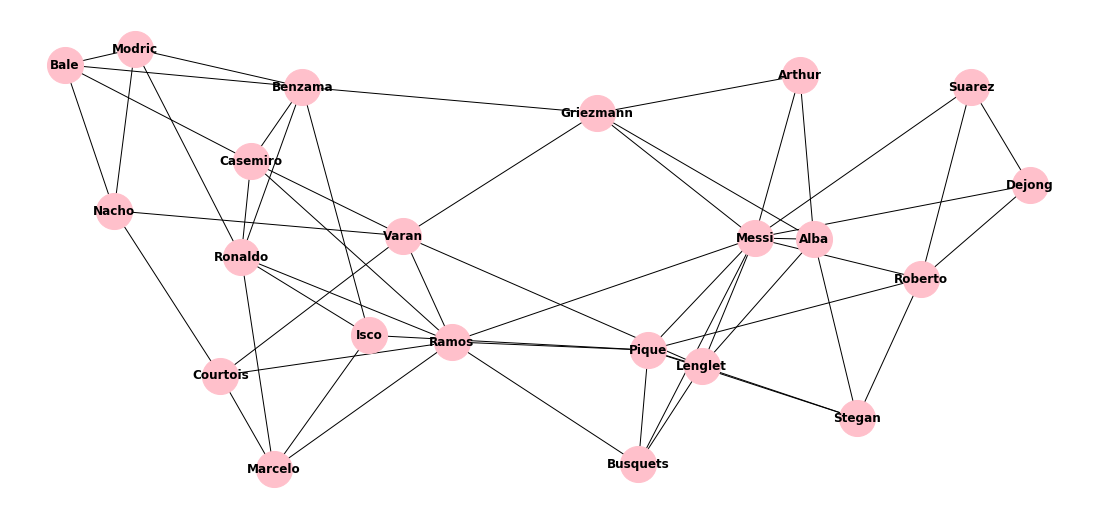

In [7]:
data = nx.read_gml("lclassico.gml")
plt.figure(1,figsize=(15,7))
nx.draw(data,with_labels=True,node_color='pink',font_weight='bold',node_size=1300)
plt.show()

In [8]:
n=len(list(data.nodes()))

In [9]:


#preserving labels for future use
labels = {}
labels_list = list(data.nodes())
for i in range(len(list(data.nodes()))):
    labels[i] = labels_list[i]





#extracting adjacency matrix out of graph
el_classico_matrix = nx.to_numpy_matrix(data)  #NOT USING NUMPY !! ITS THE LIBRARY FUNCTION OF NETWORKX TO EXTRACT ADJACENCY MATRIX
el_classico_matrix_list = el_classico_matrix.tolist()
degree_el_classico_matrix = give_zero_matrix(n,n)
ones = [[1] for i in range(n)]
degree_el_classico_list = matrix_mul(el_classico_matrix_list,ones)
degree_el_classico_list = [i[0] for i in degree_el_classico_list]
for i in range(n):
    degree_el_classico_matrix[i][i] = sum(el_classico_matrix_list[i])

In [12]:
#-----------------1) Degree centrality-------------------------------------
print("--------------1) Degree Centrality (normalized)-----------------------------------")
for key,value in labels.items(): 
    print(str(value)+"="+str(degree_el_classico_list[key]/max(degree_el_classico_list))) #check

#-----------------2) Closeness Centrality----------------------------------

#All pair shortest path aux function - Floyd Marshall
def floyd_marshall_ap_shortest_paths(a):
    V = range(len(a))
    for k in V:
        for u in V:
            for v in V:
                a[u][v] = min(a[u][v],a[u][k] + a[k][v])
    for v in V:
        if a[v][v] < 0:      
            return True
    return False
em = copy.deepcopy(el_classico_matrix_list)
INF=999999999999
for i in range(len(em)):
    for j in range(len(em)):
        if em[i][j]==0:
            em[i][j]=INF
        if i==j:
            em[i][j]=0
x = floyd_marshall_ap_shortest_paths(em)
if x:
    print("negative cycles found")
print("--------------2) Closeness Centrality (lesser the value, closer to others and hence more central)-----------------")
c=0
for i in em:
    print(str(labels[c])+"="+str(sum(i)))
    c+=1








--------------1) Degree Centrality (normalized)-----------------------------------
Stegan=0.4
Roberto=0.5
Pique=0.7
Lenglet=0.6
Alba=0.5
Dejong=0.3
Busquets=0.4
Arthur=0.3
Messi=1.0
Suarez=0.3
Griezmann=0.5
Courtois=0.4
Marcelo=0.4
Ramos=0.8
Varan=0.6
Nacho=0.4
Isco=0.4
Casemiro=0.5
Modric=0.4
Ronaldo=0.6
Benzama=0.6
Bale=0.4
--------------2) Closeness Centrality (lesser the value, closer to others and hence more central)-----------------
Stegan=48.0
Roberto=49.0
Pique=38.0
Lenglet=41.0
Alba=45.0
Dejong=52.0
Busquets=42.0
Arthur=47.0
Messi=35.0
Suarez=52.0
Griezmann=38.0
Courtois=45.0
Marcelo=47.0
Ramos=34.0
Varan=40.0
Nacho=51.0
Isco=44.0
Casemiro=43.0
Modric=52.0
Ronaldo=43.0
Benzama=43.0
Bale=53.0


In [13]:

#making normalized dolphin laplacian matrix

identity_matrix = give_me_identity(n)
for i in range(n):
    degree_el_classico_matrix[i][i] = 1/((degree_el_classico_matrix[i][i])**(1/2))

temp = matrix_mul(degree_el_classico_matrix,el_classico_matrix_list)
norm_laplacian = matrix_diff(identity_matrix,matrix_mul(temp,degree_el_classico_matrix))

#------EIGEN VALUES, EIGEN VECTORS OF NORMALIZED LAPLACIAN & CALCULATION OF FIEDLER VECTOR

#-------------Eigen vals and eigen vecs calculation using QR algorithm built in part 1--------
eigenvals = eigvals_scratch_qr(norm_laplacian)[0]
eigenvecs = eigvals_scratch_qr(norm_laplacian)[1]


def argsort(a): 
    return sorted(range(len(a)), key=a.__getitem__)

ind = argsort(eigenvals)
sorted_eigenvecs = []
for i in ind:
    sorted_eigenvecs.append(get_column_k(eigenvecs,i))

In [14]:
import copy

#-------------------K-means algorithm scratch implementation for k=2 and 1D data (acc to requirement of assignment)----------------------------------
def distance(x1,x2):
    return abs(x1-x2)
def mean(v):
    return sum(v)/len(v)
def update_centroid(labels,v):
    cluster ={}
    for key,value in labels.items():
        if value not in cluster.keys():
            cluster[value] = [v[key]]
        else:
            cluster[value].append(v[key])
    centroid_1 = mean(cluster[1])
    centroid_2 = mean(cluster[2])
    return centroid_1,centroid_2
        
#for two cluster 
def kmeans_scratch(v,seed):
    centroid_1 = seed
    centroid_2 = -seed
    
    labels = {}
    delta_centroid=999999                  #assigning high value
    while (delta_centroid>0.5):           #till centroid don't change that much 
        c=0
        for i in v:
            d_centroid_1 = distance(i,centroid_1)
            d_centroid_2 = distance(i,centroid_2)
            if d_centroid_1>d_centroid_2:
                labels[c]=1
            else:
                labels[c]=2
            c+=1
        
        old_centroid_1 = copy.deepcopy(centroid_1)
        centroid_1,centroid_2 = update_centroid(labels,v)
        delta_centroid = abs(old_centroid_1 - centroid_1)
    return labels
            


In [15]:
v = sorted_eigenvecs[1]
v = [v[i][0] for i in range(len(v))]
labels_1 = kmeans_scratch(v,mean(v))

In [16]:
colors = [0]*22
for key,value in labels_1.items():
    colors[key]=value
colors = ['yellow' if i==1 else 'pink' for i in colors]

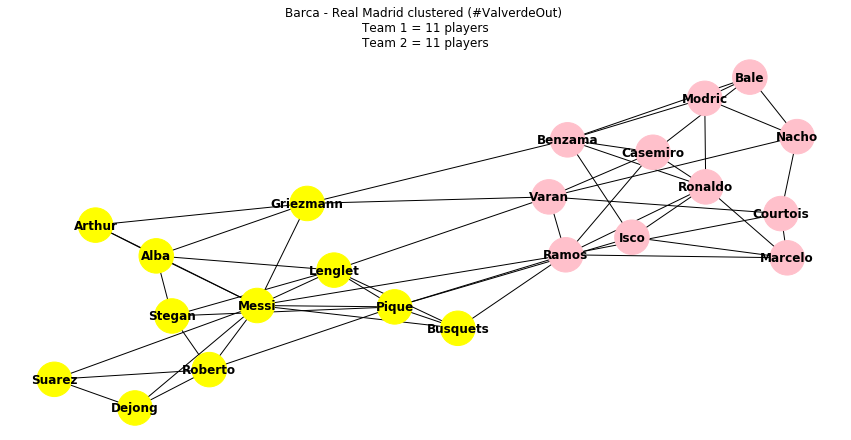

In [17]:
#plotting clustered communities
g = nx.from_numpy_matrix(el_classico_matrix)
plt.figure(1,figsize=(15,7))
plt.title("Barca - Real Madrid clustered (#ValverdeOut) \nTeam 1 = "+str(colors.count('yellow'))+" players\nTeam 2 = "+str(colors.count('pink'))+" players")
dolphin_graph_r = nx.Graph()
nx.draw(g,with_labels=True,font_weight='bold',font_color='black',node_color=colors,labels=labels,node_size=1190)
plt.show()